In [1]:
%pip install -q mediapipe


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
%pip install kagglehub

  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.3 MB/s eta 0:00:00
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 18.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayuraj/asl-dataset")

print("Path to dataset files:", path)

/Users/suryansh/Desktop/SLR/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/suryansh/.cache/kagglehub/datasets/ayuraj/asl-dataset/versions/1


In [1]:
import pandas as pd
import os

# Input data files are available in the read-only "../input/" directory
directory_path = '/Users/suryansh/.cache/kagglehub/datasets/ayuraj/asl-dataset/versions/1/asl_dataset'
folders_list = []

# Directory listing
for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path):
        folders_list += [item]
    elif os.path.isdir(item_path):
        folders_list += [f'{item}:{len(os.listdir(item_path))}']

print(f'Folders: {folders_list}')

Folders: ['r:70', 'u:70', '9:70', '0:70', '7:70', 'i:70', 'n:70', 'g:70', '6:70', 'z:70', '1:70', '8:70', 't:65', 's:70', 'a:70', 'f:70', 'o:70', 'h:70', 'asl_dataset:36', 'm:70', 'j:70', 'c:70', 'd:70', 'v:70', 'q:70', '4:70', 'x:70', '3:70', 'e:70', 'b:70', 'k:70', 'l:70', '2:70', 'y:70', '5:70', 'p:70', 'w:70']


In [2]:
# Import necessary modules from Mediapipe
from mediapipe import solutions  # Contains hand tracking and drawing utilities
from mediapipe.framework.formats import landmark_pb2  # Helps with formatting the landmark points
import numpy as np  # For handling image arrays

# Function to draw hand landmarks on the image
# Input:
# - rgb_image: the original image in RGB format
# - detection_result: results from the hand landmark detection (contains hand landmarks and handedness)
def draw_landmarks_on_image(rgb_image, detection_result):
    # Extract detected hand landmarks and handedness (right/left hand)
    hand_landmarks_list = detection_result.hand_landmarks
    handedness_list = detection_result.handedness

    # Make a copy of the original image to draw landmarks on
    annotated_image = np.copy(rgb_image)

    # Loop through each detected hand to visualize its landmarks
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks = hand_landmarks_list[idx]  # Get the landmarks for the current hand
        handedness = handedness_list[idx]  # Get whether it's a left or right hand (for potential future use)

        # Prepare the landmarks in a format required by Mediapipe's drawing function
        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        hand_landmarks_proto.landmark.extend([
            # Convert each landmark (x, y, z) to the required format
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
        ])

        # Use Mediapipe's drawing utility to draw the landmarks and connections on the image
        solutions.drawing_utils.draw_landmarks(
            annotated_image,  # Image to annotate
            hand_landmarks_proto,  # Landmarks to draw
            solutions.hands.HAND_CONNECTIONS,  # Connections between landmarks (to form the hand's skeleton)
            solutions.drawing_styles.get_default_hand_landmarks_style(),  # Style for landmarks
            solutions.drawing_styles.get_default_hand_connections_style()  # Style for connections
        )

    # Return the image with landmarks drawn on it
    return annotated_image

I0000 00:00:1729686903.458257 2351284 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1729686903.492204 2438796 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1729686903.515030 2438798 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1729686903.561219 2438796 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
/Users/suryansh/Projects/SLR/myenv/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed 

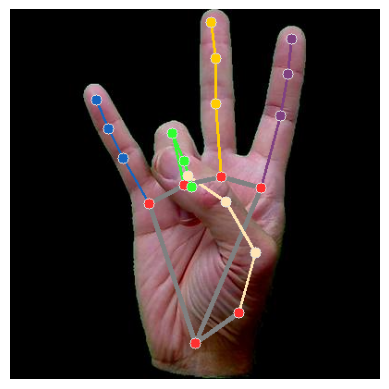

Landmarks:
[0.5004634261131287, 0.9049205780029297, 7.608870760122954e-07]
[0.6188706159591675, 0.8209401369094849, -0.09005367010831833]
[0.6640430092811584, 0.6593465209007263, -0.12033131718635559]
[0.5830232501029968, 0.521405816078186, -0.14393408596515656]
[0.4808416962623596, 0.45008888840675354, -0.16288939118385315]
[0.6787438988685608, 0.4832218587398529, -0.06071183830499649]
[0.7309463024139404, 0.2899051904678345, -0.09304177016019821]
[0.7509928941726685, 0.1758374571800232, -0.11348720639944077]
[0.7608997821807861, 0.08080795407295227, -0.1306365430355072]
[0.5720964074134827, 0.4533798396587372, -0.05809244140982628]
[0.5569555759429932, 0.255587100982666, -0.10494330525398254]
[0.5551141500473022, 0.1343189775943756, -0.14652439951896667]
[0.5428345799446106, 0.035467296838760376, -0.17350585758686066]
[0.47135937213897705, 0.47605574131011963, -0.06584429740905762]
[0.4377613067626953, 0.33507418632507324, -0.14207442104816437]
[0.47179749608039856, 0.412215501070022

In [3]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
import cv2  # Import OpenCV for image manipulation

# Initialize the hand landmarker model
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# Load an example image from the dataset
image_path = "/Users/suryansh/.cache/kagglehub/datasets/ayuraj/asl-dataset/versions/1/asl_dataset/7/hand1_7_dif_seg_5_cropped.jpeg"
image = mp.Image.create_from_file(image_path)

# Convert the image to BGR format using OpenCV
image_np = cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGB2BGR)

# Detect hand landmarks in the image
detection_result = detector.detect(image)

# Visualize the hand landmarks on the image
annotated_image = draw_landmarks_on_image(image_np, detection_result)

# Display the annotated image using matplotlib
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))  # Convert back to RGB for display
plt.axis("off")
plt.show()

# Print the detected landmarks for the first hand (x, y, z coordinates for each landmark)
print('Landmarks:')
for landmark in detection_result.hand_landmarks[0]:
    print([landmark.x, landmark.y, landmark.z])

# Output the total number of landmarks detected (should be 21 for a full hand detection)
landmarks_cnt = len(detection_result.hand_landmarks[0])
print(f'Landmarks count: {landmarks_cnt}')

In [4]:
%%time
# Measure the time it takes to process the dataset

from PIL import Image, ImageOps  # Libraries to handle image processing

images, source_df = [], []  # Lists to store images and corresponding data
skipped_images = 0  # Counter for images where landmark detection fails

# Loop through each folder (representing a hand sign class) in the dataset
for folder in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder)

    if os.path.isdir(folder_path):
        # Loop through each image in the folder
        for item in os.listdir(folder_path):
            item_path = os.path.join(folder_path, item)

            if os.path.isfile(item_path):
                # Read the image and add a black border around it to help with landmark detection
                border_size = 100  # Border size for padding
                source_img = Image.open(item_path)  # Open the image using PIL
                img = np.array(ImageOps.expand(source_img, border=border_size, fill='black'))  # Add black border
                img = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)  # Convert to Mediapipe image format

                # Detect hand landmarks in the image
                detection_result = detector.detect(img)

                if len(detection_result.hand_landmarks) > 0:
                    # If landmarks are detected, annotate the image with landmarks
                    annotated_image = draw_landmarks_on_image(img.numpy_view(), detection_result)

                    # Remove the added border after detection
                    annotated_image = annotated_image[border_size:-border_size, border_size:-border_size]

                    # Extract the hand landmarks (x, y, z coordinates)
                    landmarks = [[lm.x, lm.y, lm.z] for lm in detection_result.hand_landmarks[0]]

                    # Append the image data, including the original and annotated images and landmarks, to the dataset
                    source_df += [{"class": folder,
                                  "image": np.array(source_img),  # Store the original image
                                  "annotated_image": annotated_image,  # Store the annotated image
                                  "landmarks": landmarks  # Store the hand landmarks
                                  }]
                else:
                    # Count how many images were skipped due to failed landmark detection
                    skipped_images += 1

# Print the number of successfully processed images and skipped images
print(f'images:{len(source_df)}  skipped:{skipped_images}')

# Convert the list of image data into a pandas DataFrame for easier manipulation later
source_df = pd.DataFrame(source_df)

images:2374  skipped:141
CPU times: user 1min 1s, sys: 1.86 s, total: 1min 2s
Wall time: 1min 2s


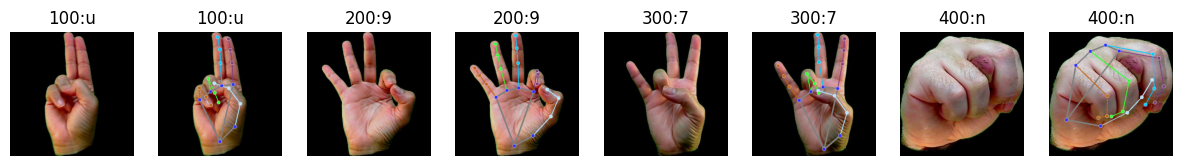

In [5]:
# Select 4 random image indices to check the original and annotated images
img_nums = (100, 200, 300, 400)  # Tuple of random images (indices) to visualize

# Set up the plotting space with a figure size of 15x3
plt.figure(figsize=(15, 3))

# Loop through the selected image indices
for i in range(4):
    # Get the row (data) corresponding to the selected image index from the dataframe
    row = source_df.iloc[img_nums[i]]

    # Plot the original image
    plt.subplot(1, 8, i*2+1)  # Create a subplot for the original image
    plt.imshow(row['image'])  # Show the original image
    plt.title(f"{img_nums[i]}:{row['class']}")  # Set the title to display the image index and class
    plt.axis("off")  # Hide the axis for a cleaner visualization

    # Plot the annotated image (with landmarks drawn)
    plt.subplot(1, 8, i*2+2)  # Create a subplot for the annotated image
    plt.imshow(row['annotated_image'])  # Show the image with landmarks drawn on it
    plt.title(f"{img_nums[i]}:{row['class']}")  # Set the title to display the image index and class
    plt.axis("off")  # Hide the axis for a cleaner visualization

# Show the plot with all images displayed
plt.show()

In [6]:
# Print the first 10 records of the dataset to check the class labels and the hand landmarks
print(source_df[["class", "landmarks"]].head(10))

# Compute and print the number of records (images) available in each class
# This helps us understand the distribution of our dataset across the different hand signs
print(dict(source_df.groupby('class').size()))  # Group by class and count the number of images per class

  class                                          landmarks
0     r  [[0.4969148635864258, 0.7334549427032471, 6.62...
1     r  [[0.4969249963760376, 0.7476432919502258, 3.53...
2     r  [[0.5100231766700745, 0.7341750264167786, 3.28...
3     r  [[0.5053418874740601, 0.7523879408836365, 1.03...
4     r  [[0.5071184635162354, 0.8205285668373108, 3.37...
5     r  [[0.5243170261383057, 0.8237123489379883, 4.28...
6     r  [[0.506830632686615, 0.7816975116729736, 7.463...
7     r  [[0.5168795585632324, 0.7913376688957214, 6.99...
8     r  [[0.5159000754356384, 0.7657874822616577, 8.07...
9     r  [[0.5195662975311279, 0.7612046003341675, 3.59...
{'0': 61, '1': 67, '2': 70, '3': 70, '4': 67, '5': 70, '6': 60, '7': 63, '8': 64, '9': 68, 'a': 70, 'b': 70, 'c': 60, 'd': 70, 'e': 63, 'f': 70, 'g': 69, 'h': 69, 'i': 70, 'j': 61, 'k': 70, 'l': 70, 'm': 62, 'n': 65, 'o': 61, 'p': 64, 'q': 51, 'r': 66, 's': 70, 't': 65, 'u': 70, 'v': 69, 'w': 63, 'x': 63, 'y': 70, 'z': 63}


In [18]:
import os

# Define and create the path
gz_file_path = '/Users/suryansh/Desktop/SLR/hand_landmarks.pkl.gz'
os.makedirs(os.path.dirname(gz_file_path), exist_ok=True)

# Save the DataFrame
%time source_df.to_pickle(gz_file_path)

# Print the file size
print(f"File size: {os.path.getsize(gz_file_path) / 1024 / 1024:.2f} MB")

CPU times: user 1min 15s, sys: 1.47 s, total: 1min 17s
Wall time: 1min 17s
File size: 729.22 MB


In [7]:
# Measure the time it takes to load the dataset from the compressed pickle file
# This ensures the dataset was saved correctly and can be loaded efficiently
%time check_df = pd.read_pickle('/Users/suryansh/Projects/SLR/hand_landmarks.pkl.gz')

CPU times: user 2.72 s, sys: 296 ms, total: 3.02 s
Wall time: 2.88 s


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Flatten the landmark features and create a feature matrix (X)
# Each landmark list has 21 points, and each point has (x, y, z), so total features = 21 * 3 = 63
X = check_df['landmarks'].apply(lambda lm: [coord for point in lm for coord in point]).tolist()

# Convert the feature list to a DataFrame
X = pd.DataFrame(X)

# Encode the class labels (y)
le = LabelEncoder()
y = le.fit_transform(check_df['class'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)


# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

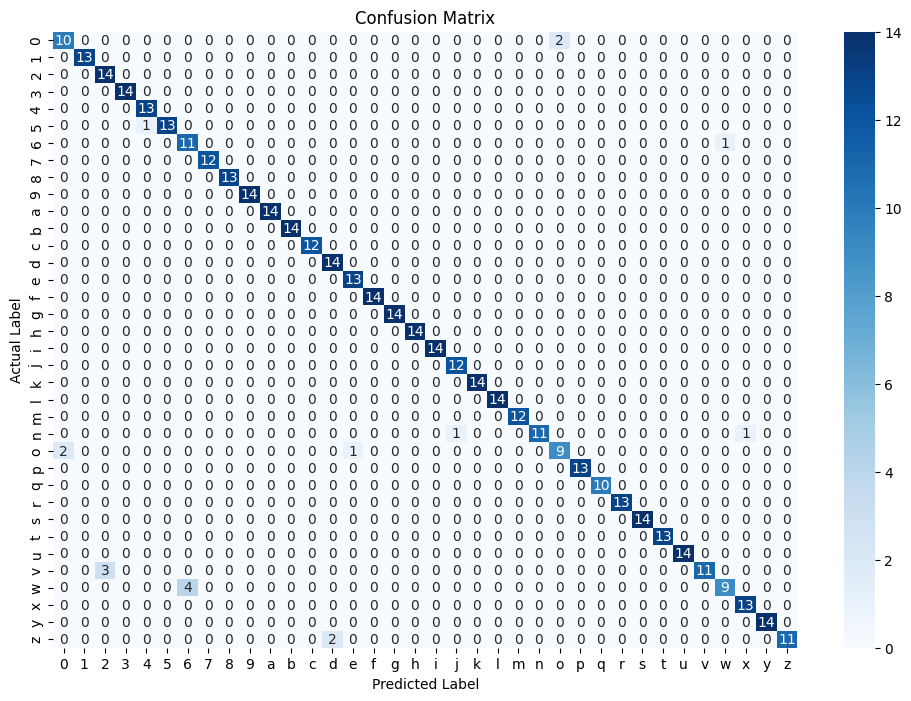

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

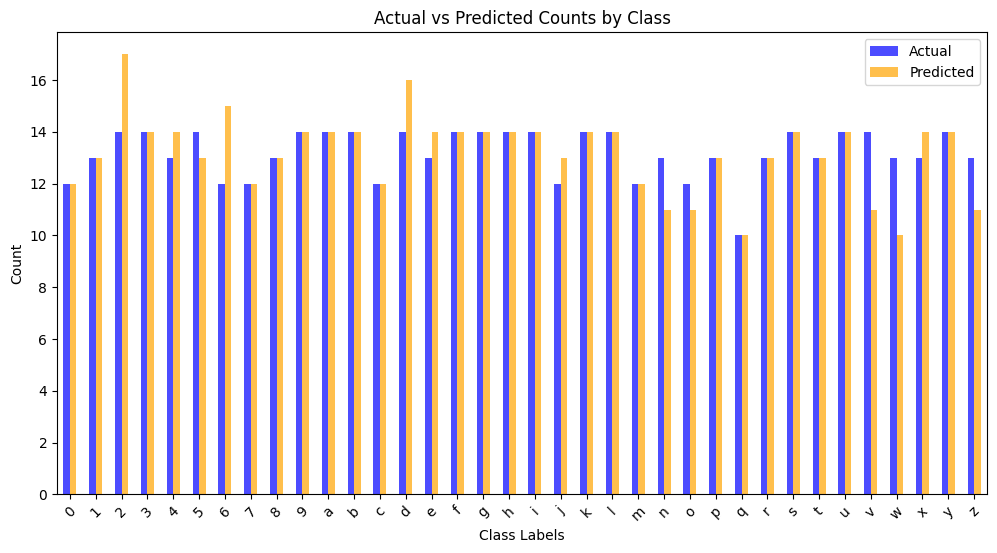

In [25]:
# Bar graph showing actual vs predicted counts for each class
actual_counts = pd.Series(y_test).value_counts().reindex(range(len(le.classes_)), fill_value=0)
predicted_counts = pd.Series(y_pred).value_counts().reindex(range(len(le.classes_)), fill_value=0)

# Creating a DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
}).reset_index().rename(columns={'index': 'Class'})

# Plotting the bar graph
comparison_df.plot(x='Class', kind='bar', figsize=(12, 6),
                   color=['blue', 'orange'], alpha=0.7)
plt.title('Actual vs Predicted Counts by Class')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_, rotation=45)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [10]:
import pickle

# Assuming rf_model is your trained Random Forest model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

In [8]:
import pickle

# Load the trained Random Forest model
with open('random_forest_model.pkl', 'rb') as model_file:
    rf_model = pickle.load(model_file)

print(type(rf_model))  # Check the type of the loaded model

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [10]:
import cv2
import numpy as np
import mediapipe as mp
import pickle

# Load or train the Random Forest model
with open('random_forest_model.pkl', 'rb') as model_file:
    rf_model = pickle.load(model_file)  # Load your saved model

z = le.fit(check_df['class'])
# Initialize Mediapipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Function to preprocess the hand landmarks
def preprocess_landmarks(landmarks):
    return np.array([[lm.x, lm.y, lm.z] for lm in landmarks]).flatten()

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Ignoring empty camera frame.")
        continue

    image = cv2.flip(image, 1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            landmarks_data = preprocess_landmarks(hand_landmarks.landmark)

            # Make prediction
            prediction = rf_model.predict([landmarks_data])  # Predict the class
            predicted_class = z.inverse_transform(prediction)

            cv2.putText(image, f'Predicted: {predicted_class[0]}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    cv2.imshow('ASL Real-Time Prediction', image)

    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

I0000 00:00:1729700694.131581 2351284 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1729700694.158612 2514419 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1729700694.168698 2514417 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
2024-10-23 21:54:56.237 Python[75692:2351284] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-23 21:54:56.237 Python[75692:2351284] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
/Users/suryansh/Projects/SLR/myenv/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated.

: 